In [10]:

!pip install keras-preprocessing
import cv2
import glob
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import os
from pathlib import Path
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras_preprocessing import image
import xml.etree.ElementTree as ET


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
#input dog images
def dog_images(dog_breed):
    print(dog_breed)
    path = f'/content/drive/MyDrive/MyImages/{dog_breed}/*'
    return glob.glob(path)
cropped = "./content/drive/MyDrive/ResizedImages"
dog_images_list = []
dog_breeds = {
    0: 'n02092002-Scottish_deerhound',
    1: 'n02089078-black-and-tan_coonhound',
    2: 'n02091831-Saluki',
    3: 'n02095314-wire-haired_fox_terrier'
}
for i in range(4):
    dog_images_list+=dog_images(dog_breeds[i])

n02092002-Scottish_deerhound
n02089078-black-and-tan_coonhound
n02091831-Saluki
n02095314-wire-haired_fox_terrier


In [13]:
#input annotations
def annotations(dog_breed):
    print(dog_breed)
    path = os.path.join('/content/drive/MyDrive/MyAnnotations', dog_breed, '*')
    return glob.glob(path)

annotations_list = []

for i in range(4):
    annotations_list+=annotations(dog_breeds[i])

n02092002-Scottish_deerhound
n02089078-black-and-tan_coonhound
n02091831-Saluki
n02095314-wire-haired_fox_terrier


In [14]:
# Normalize and convert '/' as the path separator for annotations_list
annotations_list = [os.path.normpath(i).replace(os.sep, '/') for i in annotations_list]
# Normalize and convert '/' as the path separator for dog_images_list
dog_images_list = [os.path.normpath(i).replace(os.sep, '/') for i in dog_images_list]

In [15]:
len(dog_images_list)

748

In [16]:
#image cropping using the code snippets provided

class crop_resize:
    def __init__(self):
        pass
    def get_bounding_boxes(self,annot):
        xml = annot
        tree = ET.parse(xml)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin,ymin,xmax,ymax))
        return bbox

    def get_image(self,annot):
        img_path = '/content/drive/MyDrive/MyImages/'
        file = annot.split('/')
        img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
        return img_filename

    def image_save(self):
        for i in range(len(dog_images_list)):

            bbox = self.get_bounding_boxes(annotations_list[i])
            dog = self.get_image(annotations_list[i])
            im = Image.open(dog)
            for j in range(len(bbox)):
                im2 = im.crop(bbox[j])
                im2 = im2.resize((128,128), Image.ANTIALIAS)
                new_path = dog.replace('/content/drive/MyDrive/MyImages/','/content/drive/MyDrive/ResizedImages/')
                new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
                im2=im2.convert('RGB')
                head, tail = os.path.split(new_path)
                Path(head).mkdir(parents=True, exist_ok=True)
                im2.save(new_path)

In [9]:
c=crop_resize()
c.image_save()

<ipython-input-8-ad1ccf8bd86b>:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  im2 = im2.resize((128,128), Image.ANTIALIAS)


In [22]:
len(dog_images_list)

748

In [54]:
#selecting cropped images
dog_images_cropped=glob.glob('/content/drive/MyDrive/ResizedImages/*/*')

In [55]:
def images_select(num_imag):
    def count_of_images(dog_breed, image_list):
      count = 0
      for i in image_list:
          split_path = str(i).split('/')
          if len(split_path) >= 7 and split_path[6] == dog_breed:
              count += 1
      if count < num_imag:
        return True
      else:
        return False



    images_hist=[]
    for i,j in dog_breeds.items():
        for k in dog_images_cropped:
            print(str(k).split('/')[6],j)
            if str(k).split('/')[6] ==j:
                print(str(k).split('/')[6],j)
                if count_of_images(j,images_hist):
                    images_hist.append(k)
    return images_hist

In [56]:
images=images_select(2)
len(images)

n02092002_1200-0.jpg n02092002-Scottish_deerhound
n02092002_120-0.jpg n02092002-Scottish_deerhound
n02092002_11245-0.jpg n02092002-Scottish_deerhound
n02092002_11131-0.jpg n02092002-Scottish_deerhound
n02092002_10699-0.jpg n02092002-Scottish_deerhound
n02092002_1029-0.jpg n02092002-Scottish_deerhound
n02092002_10693-0.jpg n02092002-Scottish_deerhound
n02092002_10060-0.jpg n02092002-Scottish_deerhound
n02092002_11105-0.jpg n02092002-Scottish_deerhound
n02092002_11105-1.jpg n02092002-Scottish_deerhound
n02092002_11088-0.jpg n02092002-Scottish_deerhound
n02092002_11087-0.jpg n02092002-Scottish_deerhound
n02092002_10911-0.jpg n02092002-Scottish_deerhound
n02092002_1086-0.jpg n02092002-Scottish_deerhound
n02092002_1086-1.jpg n02092002-Scottish_deerhound
n02092002_109-0.jpg n02092002-Scottish_deerhound
n02092002_7890-0.jpg n02092002-Scottish_deerhound
n02092002_7835-0.jpg n02092002-Scottish_deerhound
n02092002_7181-0.jpg n02092002-Scottish_deerhound
n02092002_7206-0.jpg n02092002-Scottish_de

0

In [44]:
def images_select(num_imag, dog_breeds, dog_images_cropped):
    def count_of_images(dog_breed, image_list):
        count = sum(1 for image_path in image_list if len(image_path.split('/')) > 6 and image_path.split('/')[6] == dog_breed)
        return count < num_imag

    images_hist = []
    images_per_class = {breed: 0 for breed in dog_breeds.keys()}  # Counter for selected images per class

    for breed, breed_images in dog_breeds.items():
        for image_path in breed_images:
            if count_of_images(breed, images_hist) and images_per_class[breed] < num_imag:
                images_hist.append(image_path)
                images_per_class[breed] += 1  # Increment counter for selected images in this class

    return images_hist

# Example usage:
# Assuming you have defined dog_breeds and dog_images_cropped somewhere in your code
# And you want to select 2 images from each class
selected_images = images_select(2, dog_breeds, dog_images_cropped)
print(len(selected_images))
print(selected_images)


8
['n', '0', 'n', '0', 'n', '0', 'n', '0']


In [61]:
def images_select(num_imag, dog_breeds, dog_images_cropped):
    def count_of_images(dog_breed, image_list):
        count = sum(1 for image_path in image_list if len(str(image_path).split('/')) > 6 and str(image_path).split('/')[6] == dog_breed)
        return count < num_imag

    images_hist = []
    images_per_class = {breed: 0 for breed in dog_breeds.keys()}  # Counter for selected images per class

    for breed, breed_images in dog_breeds.items():
        for image_path in breed_images:
            if count_of_images(breed, images_hist) and images_per_class[breed] < num_imag:
                images_hist.append(image_path)
                images_per_class[breed] += 1  # Increment counter for selected images in this class

    return images_hist

# Example usage:
# Assuming you have defined dog_breeds and dog_images_cropped somewhere in your code
# And you want to select 2 images from each class
selected_images = images_select(2, dog_breeds, dog_images_cropped)
print(len(selected_images))
print(selected_images)



8
['n', '0', 'n', '0', 'n', '0', 'n', '0']


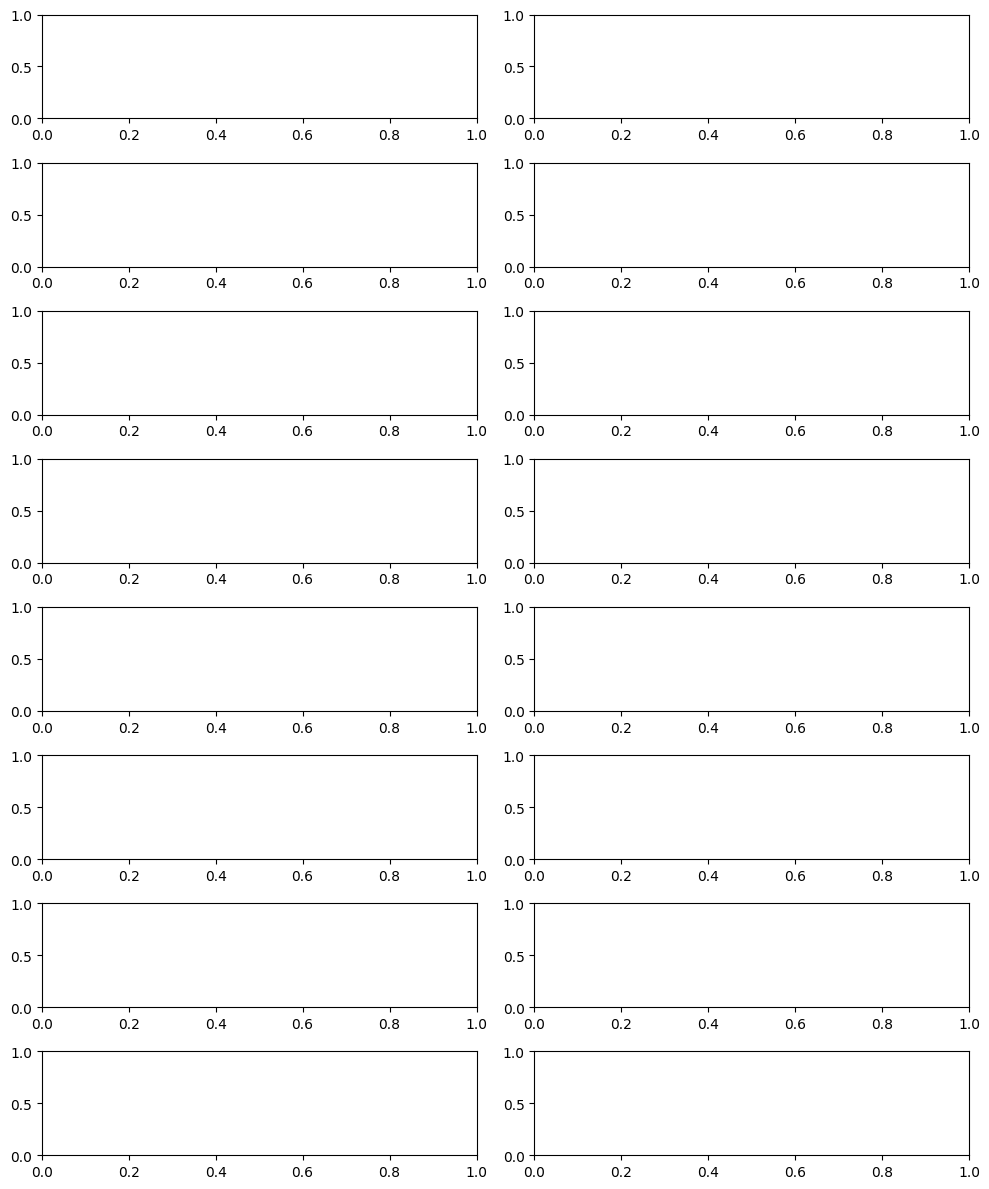

In [62]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def compute_edge_histogram(image):
    # Compute edges using Canny edge detection
    edges = cv2.Canny(image, 100, 200)

    # Compute histogram of edges
    hist, _ = np.histogram(edges.ravel(), bins=256, range=[0, 256])

    return hist

def Histogram_Equalization(image_path, x, title):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Error: Failed to read image '{image_path}'")
        return

    edge_histogram = compute_edge_histogram(img)

    ax[x, 0].imshow(img, cmap='gray')
    ax[x, 0].set_title(title)

    ax[x, 1].plot(edge_histogram)
    ax[x, 1].set_title('Edge Histogram')

def images_select(num_imag=None, dog_breeds=None, dog_images_cropped=None):
    if num_imag is not None and dog_breeds is not None and dog_images_cropped is not None:
        images_hist = []
        images_per_class = {breed: 0 for breed in dog_breeds.keys()}  # Counter for selected images per class

        for breed, breed_images in dog_breeds.items():
            for image_path in breed_images:
                if count_of_images(breed, images_hist) and images_per_class[breed] < num_imag:
                    images_hist.append(image_path)
                    images_per_class[breed] += 1  # Increment counter for selected images in this class

        return images_hist
    else:
        # Handle the case when no arguments are provided
        # For example, select all images without restrictions
        return []  # Return an empty list

# Example usage:
# Assuming you have defined the function images_select
images = images_select()

dogs = ['Scootish deerhound', 'Black-and-Tan coonhound', 'Saluki', 'Wire Haired Fox Terrier']

fig, ax = plt.subplots(8, 2, figsize=(10, 12))
ind = 0
title = dogs[ind]
for x, i in enumerate(images):
    if x != 7:
        if x % 2 == 0 and x != 0:
            title = dogs[ind + 1]
            ind += 1
    Histogram_Equalization(i, x, title)

plt.tight_layout()
plt.show()


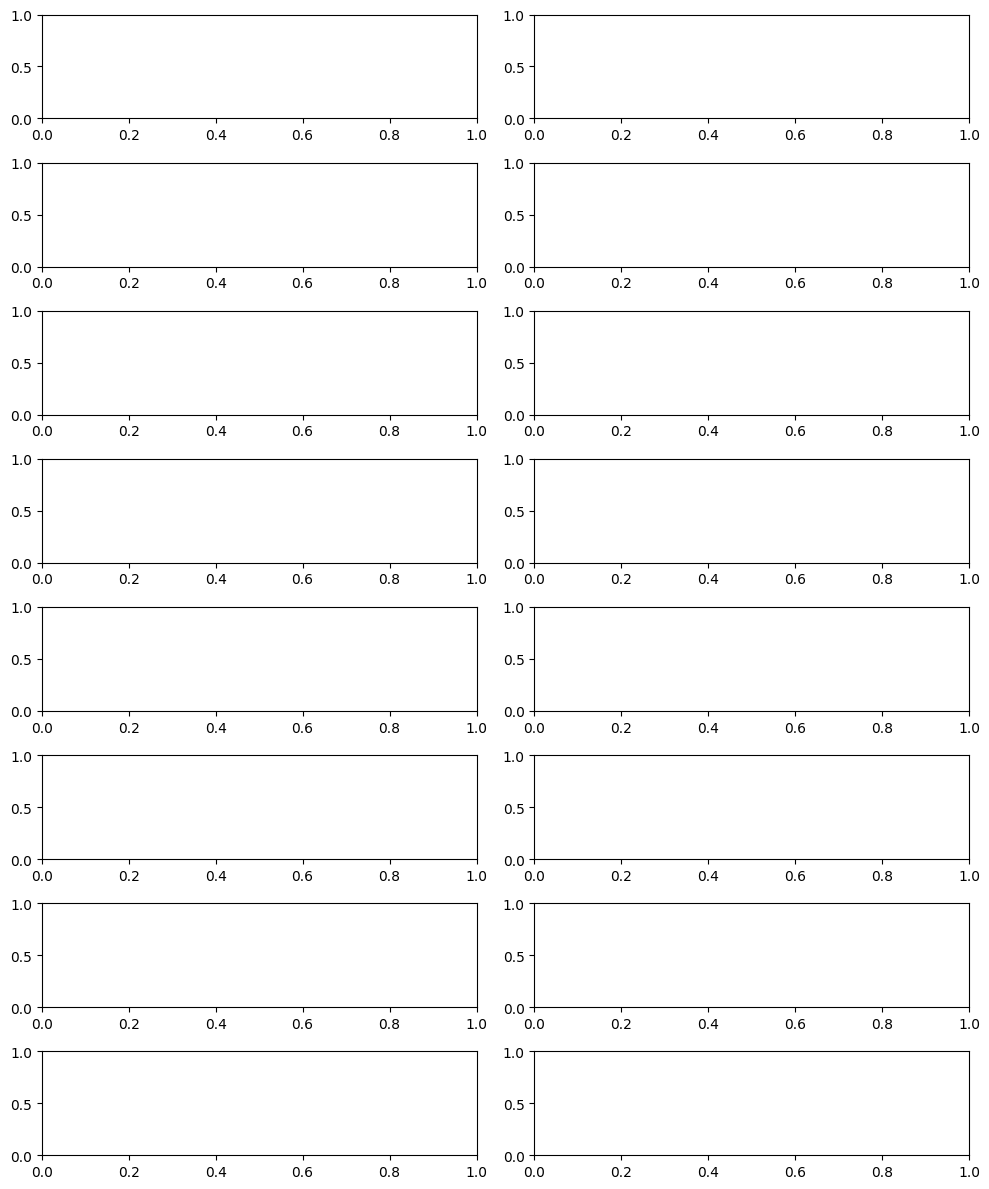

In [45]:
def Histogram_Equalization(image, x,title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    ax[x,0].imshow(img,cmap='gray')

    ax[x,0].set_title(title)
    ax[x, 1].hist(img.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')
dogs=['Scootish deerhound','Black-and-Tan coonhound','Saluki','Wire Haired Fox Terrier']

fig, ax = plt.subplots(8, 2, figsize=(10, 12))
ind=0
title=dogs[ind]
for x,i in enumerate(images):

    if x!=7:
        if x%2==0 and x!=0:
            title=dogs[ind+1]
            ind+=1
    Histogram_Equalization(i,x,title)

plt.tight_layout()
plt.show()

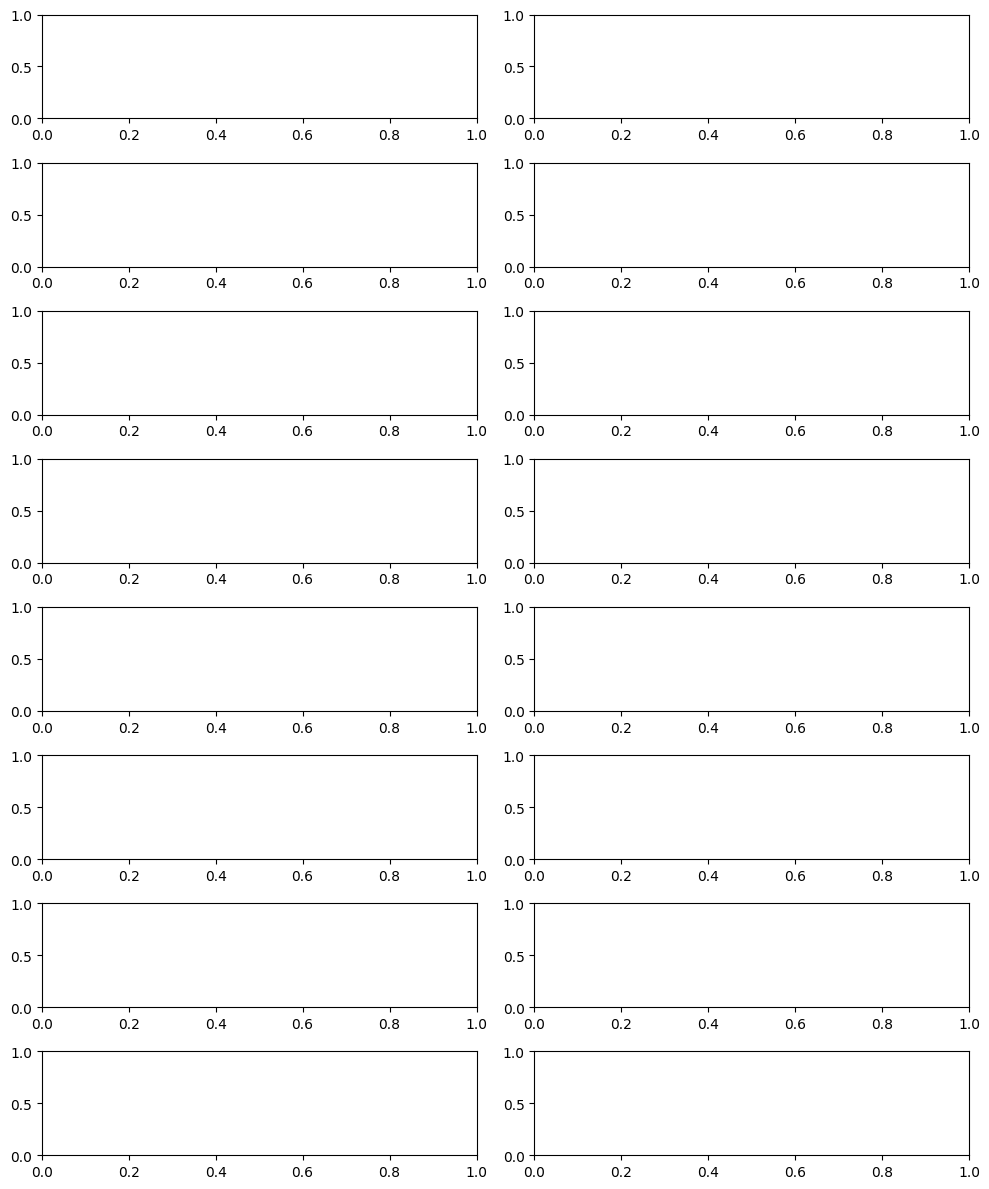

In [63]:
#Using the 8 grayscale images above, perform edge detection (see https://scikit-image.
#org/docs/stable/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples
#using the sobel edge filter.
import cv2
import matplotlib.pyplot as plt
from skimage import filters
from skimage import data

# Function to perform edge detection using Sobel filter
def Sobel_Edge_Detection(image, x, title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    # Apply Sobel filter for edge detection
    edges = filters.sobel(img)

    ax[x, 0].imshow(img, cmap='gray')
    ax[x, 0].set_title(title + ' - Grayscale Image')

    ax[x, 1].imshow(edges, cmap='gray')
    ax[x, 1].set_title(title + ' - Sobel Edge Detection')

# Assuming you have the 'images' list defined previously
# Replace 'dogs' and 'ind' as needed
dogs=['Italian greyhound','Collie','Cairn','Appenzeller']
ind = 0
title = dogs[ind]

fig, ax = plt.subplots(8, 2, figsize=(10, 12))

for x, i in enumerate(images):
    if x != 7:
        if x % 2 == 0 and x != 0:
            title = dogs[ind + 1]
            ind += 1
    Sobel_Edge_Detection(i, x, title)

plt.tight_layout()
plt.show()


NameError: name 'dogs' is not defined

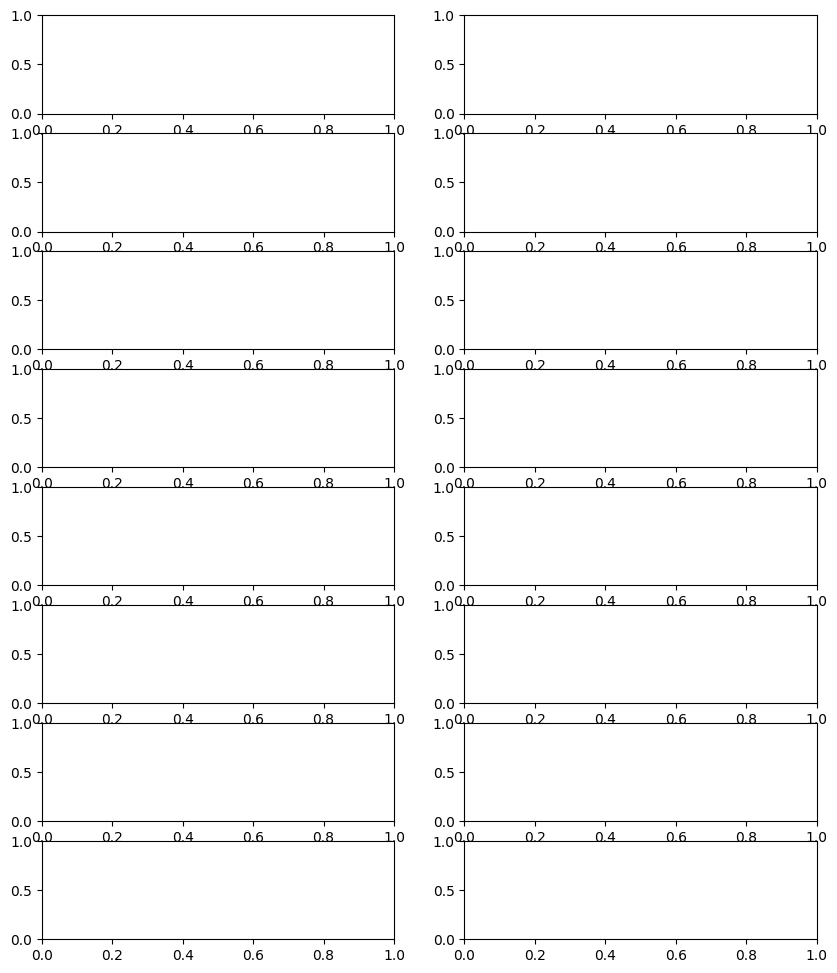

In [2]:
#lot the 8 grayscale images with their corresponding pixel intensity histograms (i.e., 256 bins)
import matplotlib.pyplot as plt

def Intensity_Equalization(image, x,title):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    equ = cv2.equalizeHist(img)
    ax[x,0].imshow(equ,cmap='gray')

    ax[x,0].set_title(title)
    ax[x, 1].hist(equ.flatten(), bins=256)
    ax[x, 1].set_title('Histogram')
fig, ax = plt.subplots(8, 2, figsize=(10, 12))
ind=0
title=dogs[ind]
for x,i in enumerate(images):

    if x!=7:
        if x%2==0 and x!=0:
            title=dogs[ind+1]
            ind+=1
    Intensity_Equalization(i,x,title)

plt.tight_layout()
plt.show()


def side_side_image(images):
    fig2, (ax1,ax2) = plt.subplots(1, 2, figsize=(5, 6))
    img = cv2.imread(images[2], cv2.IMREAD_GRAYSCALE)
    equ = cv2.equalizeHist(img)
    ax1.imshow(img,cmap='gray')
    ax1.set_title('Greyscale image')
    ax2.imshow(equ,cmap='gray')
    ax2.set_title('Histogram Equalized image')
    plt.tight_layout()
    plt.show()
side_side_image(images)

Error loading image: /content/drive/MyDrive/ResizedImages/n02092002-Scottish_deerhound
Error loading image: /content/drive/MyDrive/ResizedImages/n02089078-black-and-tan_coonhound
Error loading image: /content/drive/MyDrive/ResizedImages/n02091831-Saluki
Error loading image: /content/drive/MyDrive/ResizedImages/n02095314-wire-haired_fox_terrier


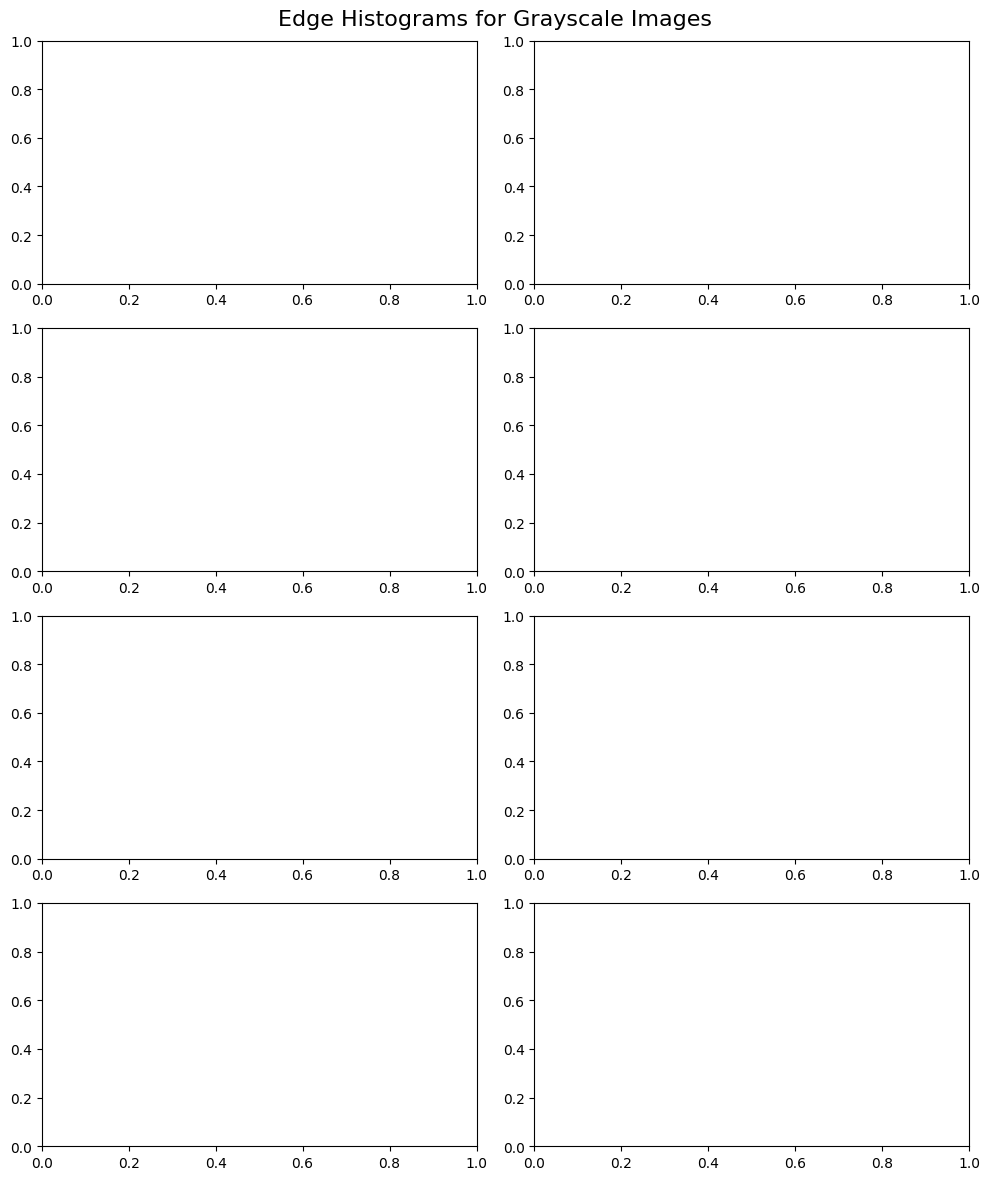

In [6]:
  import os
import cv2
import matplotlib.pyplot as plt

# Define the folder containing the images
folder_path = '/content/drive/MyDrive/ResizedImages'

def plot_edge_histograms(folder_path):
    # Get the list of image filenames in the folder
    image_files = os.listdir(folder_path)

    # Categorize the images into classes based on their filenames
    image_classes = {}
    for image_file in image_files:
        class_name = image_file.split('_')[0]  # Assuming the class name is before the first underscore
        if class_name not in image_classes:
            image_classes[class_name] = []
        image_classes[class_name].append(os.path.join(folder_path, image_file))

    fig, axes = plt.subplots(len(image_classes), 2, figsize=(10, 12))
    fig.suptitle('Edge Histograms for Grayscale Images', fontsize=16)

    for i, (class_name, class_images) in enumerate(image_classes.items()):
        for j, image_path in enumerate(class_images):
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            if image is None:
                print(f"Error loading image: {image_path}")
                continue
            edges = cv2.Canny(image, 100, 200)
            hist = cv2.calcHist([edges], [0], None, [256], [0, 256])

            axes[i, j].imshow(edges, cmap='gray')
            axes[i, j].set_title(f'{class_name} - Image {j+1}')
            axes[i, j+1].plot(hist)
            axes[i, j+1].set_title(f'{class_name} - Edge Histogram')

    plt.tight_layout()
    plt.show()

# Call the function with the folder path
plot_edge_histograms(folder_path)
